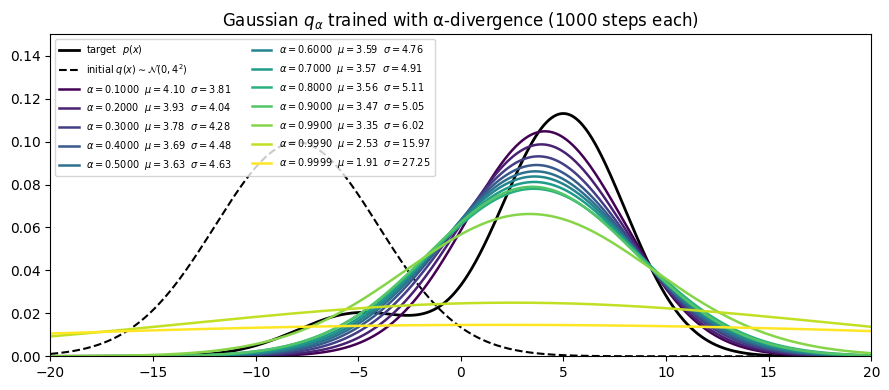

In [6]:
import torch, matplotlib.pyplot as plt
import numpy as np

# ---------------------- Target distribution  p(x) -------------------------------
def log_p_pdf(x):
    pi      = torch.tensor([0.15, 0.85])          # mixing weights
    mus     = torch.tensor([-5.0,  5.0])          # means
    sigmas  = torch.tensor([ 3.0,  3.0])          # std-devs
    cat     = torch.distributions.Categorical(pi)
    comp    = torch.distributions.Normal(mus, sigmas)
    p       = torch.distributions.MixtureSameFamily(cat, comp)
    return p.log_prob(x)                          # log p(x)

# ---------------------- Helper: train one alpha ---------------------------------
def train_one_alpha(alpha, n_steps=1000, lr=5e-2, seed=0):
    torch.manual_seed(seed)
    mu         = torch.tensor(+0.0, requires_grad=True)
    log_sigma  = torch.tensor(np.log(4.0), requires_grad=True)
    opt        = torch.optim.Adam([mu, log_sigma], lr=lr)

    for _ in range(n_steps + 1):
        sigma = log_sigma.exp()
        q     = torch.distributions.Normal(mu, sigma)
        x     = q.rsample((4000,))
        logq  = q.log_prob(x)
        logp  = log_p_pdf(x)

        # α-divergence objective
        blend = alpha * torch.exp(logq) + (1 - alpha) * torch.exp(logp)
        loss  = (logq - torch.log(blend)).mean()

        opt.zero_grad()
        loss.backward()
        opt.step()

    return mu.detach().item(), sigma.detach().item()

# ---------------------- Run for all alphas --------------------------------------
# alphas      = np.round(np.linspace(0.0, 0.9, 10), 2)   # 1.0, 0.9, ..., 0.1
alphas      = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 0.999, 0.9999])  # for better visualization

results     = {a: train_one_alpha(a) for a in alphas}

# ---------------------- Plot -----------------------------------------------------
xs = torch.linspace(-20, 20, 4001)
px = torch.exp(log_p_pdf(xs)).numpy()

# Plot p(x)
plt.figure(figsize=(9, 4))
plt.plot(xs.numpy(), px, 'k', lw=2, label='target  $p(x)$')

# Plot initial q(x) = N(0, 4^2)
init_mu, init_sigma = -8.0, 4.0
qx_init = torch.distributions.Normal(init_mu, init_sigma).log_prob(xs).exp().numpy()
plt.plot(xs.numpy(), qx_init, 'k--', lw=1.5, label=r'initial $q(x) \sim \mathcal{N}(0, 4^2)$')

# Plot final q_α(x) for each α
cmap = plt.cm.viridis(np.linspace(0, 1, len(alphas)))
for c, a in zip(cmap, alphas):
    m, s = results[a]
    qx = torch.distributions.Normal(m, s).log_prob(xs).exp().numpy()
    plt.plot(xs.numpy(), qx, color=c, lw=1.8,
             label=rf'$\alpha={a:0.4f}$  $\mu={m:5.2f}$  $\sigma={s:5.2f}$')

plt.title('Gaussian $q_\\alpha$ trained with α-divergence (1000 steps each)')
plt.xlim(-20, 20)
plt.ylim(0, 0.15)
plt.legend(fontsize=7, ncol=2)
plt.tight_layout()
plt.show()


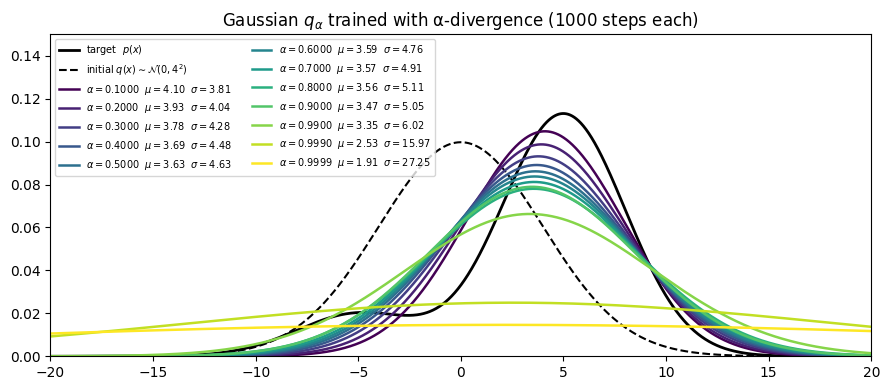

In [5]:
import torch, matplotlib.pyplot as plt
import numpy as np

# ---------------------- Target distribution  p(x) -------------------------------
def log_p_pdf(x):
    pi      = torch.tensor([0.15, 0.85])          # mixing weights
    mus     = torch.tensor([-5.0,  5.0])          # means
    sigmas  = torch.tensor([ 3.0,  3.0])          # std-devs
    cat     = torch.distributions.Categorical(pi)
    comp    = torch.distributions.Normal(mus, sigmas)
    p       = torch.distributions.MixtureSameFamily(cat, comp)
    return p.log_prob(x)                          # log p(x)

# ---------------------- Helper: train one alpha ---------------------------------
def train_one_alpha(alpha, n_steps=1000, lr=5e-2, seed=0):
    torch.manual_seed(seed)
    mu         = torch.tensor(+0.0, requires_grad=True)
    log_sigma  = torch.tensor(np.log(4.0), requires_grad=True)
    opt        = torch.optim.Adam([mu, log_sigma], lr=lr)

    for _ in range(n_steps + 1):
        sigma = log_sigma.exp()
        q     = torch.distributions.Normal(mu, sigma)
        x     = q.rsample((4000,))
        logq  = q.log_prob(x)
        logp  = log_p_pdf(x)

        # α-divergence objective
        blend = alpha * torch.exp(logq) + (1 - alpha) * torch.exp(logp)
        loss  = (logq - torch.log(blend)).mean()

        opt.zero_grad()
        loss.backward()
        opt.step()

    return mu.detach().item(), sigma.detach().item()

# ---------------------- Run for all alphas --------------------------------------
# alphas      = np.round(np.linspace(0.0, 0.9, 10), 2)   # 1.0, 0.9, ..., 0.1
alphas      = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 0.999, 0.9999])  # for better visualization

results     = {a: train_one_alpha(a) for a in alphas}

# ---------------------- Plot -----------------------------------------------------
xs = torch.linspace(-20, 20, 4001)
px = torch.exp(log_p_pdf(xs)).numpy()

# Plot p(x)
plt.figure(figsize=(9, 4))
plt.plot(xs.numpy(), px, 'k', lw=2, label='target  $p(x)$')

# Plot initial q(x) = N(0, 4^2)
init_mu, init_sigma = 0.0, 4.0
qx_init = torch.distributions.Normal(init_mu, init_sigma).log_prob(xs).exp().numpy()
plt.plot(xs.numpy(), qx_init, 'k--', lw=1.5, label=r'initial $q(x) \sim \mathcal{N}(0, 4^2)$')

# Plot final q_α(x) for each α
cmap = plt.cm.viridis(np.linspace(0, 1, len(alphas)))
for c, a in zip(cmap, alphas):
    m, s = results[a]
    qx = torch.distributions.Normal(m, s).log_prob(xs).exp().numpy()
    plt.plot(xs.numpy(), qx, color=c, lw=1.8,
             label=rf'$\alpha={a:0.4f}$  $\mu={m:5.2f}$  $\sigma={s:5.2f}$')

plt.title('Gaussian $q_\\alpha$ trained with α-divergence (1000 steps each)')
plt.xlim(-20, 20)
plt.ylim(0, 0.15)
plt.legend(fontsize=7, ncol=2)
plt.tight_layout()
plt.show()
